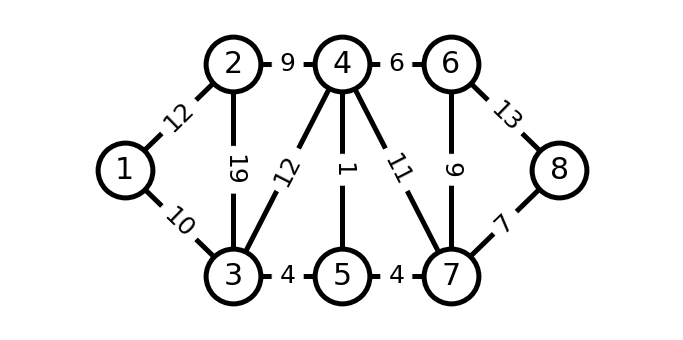

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Markdown

plt.rcParams["figure.figsize"]=12,6

G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 12),
                           (1, 3, 10),
                           (2, 3, 19),
                           (2, 4, 9),
                           (3, 4, 12),
                           (3, 5, 4),
                           (4, 5, 1),
                           (4, 6, 6),
                           (4, 7, 11),
                           (5, 7, 4),
                           (6, 7, 9),
                           (6, 8, 13),
                           (7, 8 , 7)]
                         )

# explicitly set positions
pos = {1: (0, 0.1), 2: (10, 0.2), 3: (10, 0), 4: (20, 0.2), 5: (20, 0) ,6: (30, 0.2), 7: (30, 0), 8: (40, 0.1) }
#pos = nx.spring_layout(G, seed=None)
options = {
    "font_size": 30,
    #"edgefont": 20,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, font_size = 25)

# Set margins for the axes so that nodes aren't clipped

ax = plt.gca()
ax.margins(0.2)



#plt.figure(figsize=(3, 3))
plt.axis("off")
plt.show()

# Prim Algorithm

## Start node

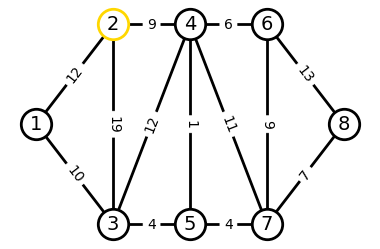

## 2.Node

Startnode,Endnode,Edgevalue,Selected
2,1,12,False
2,3,19,False
2,4,9,True


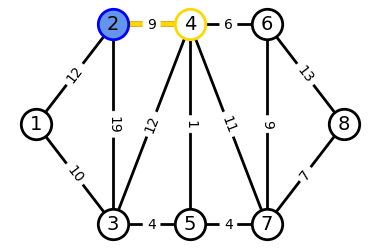

## 3.Node

Startnode,Endnode,Edgevalue,Selected
2,1,12,False
2,3,19,False
4,3,12,False
4,5,1,True
4,6,6,False
4,7,11,False


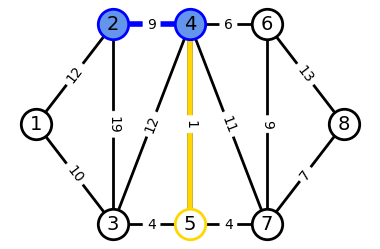

## 4.Node

Startnode,Endnode,Edgevalue,Selected
2,1,12,False
2,3,19,False
4,3,12,False
4,6,6,False
4,7,11,False
5,3,4,True
5,7,4,False


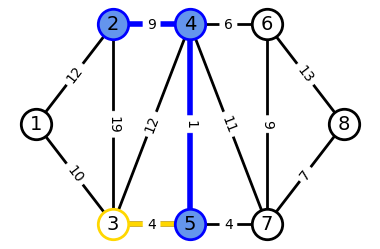

## 5.Node

Startnode,Endnode,Edgevalue,Selected
2,1,12,False
3,1,10,False
4,6,6,False
4,7,11,False
5,7,4,True


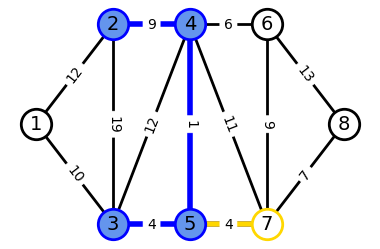

## 6.Node

Startnode,Endnode,Edgevalue,Selected
2,1,12,False
3,1,10,False
4,6,6,True
7,6,9,False
7,8,7,False


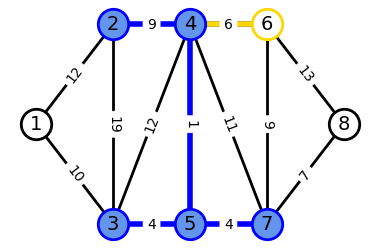

## 7.Node

Startnode,Endnode,Edgevalue,Selected
2,1,12,False
3,1,10,False
6,8,13,False
7,8,7,True


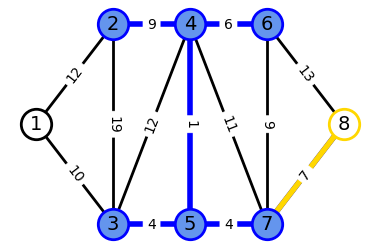

## 8.Node

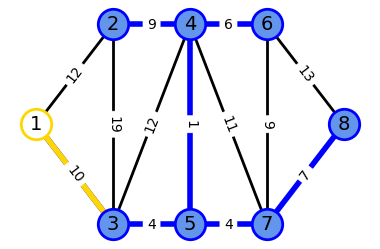

## Final Graph

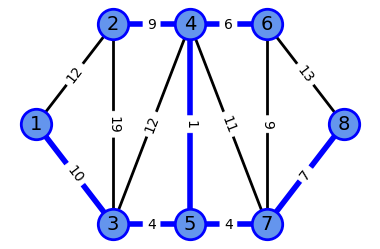

#### The shortest path to connect all nodes is 41 Units long.

In [2]:

def prim_algorithm(start_node, Graph):
    Network = Graph.copy()
    visited_nodes = [start_node]
    new_selected_node = start_node
    total_nodes = len(list(Network.nodes))
    open_edges = [] #[new_selected_node, endnode, edge_weight, smallest edge_weight?]
    final_path = []
    save_open_edges = []
    df_list_open_edges = []
    
    while len(visited_nodes) != total_nodes:
        #tumple with dictionary within of all edges that are connected to new_selected_node
        open_edges = sorted(list(Network.edges(new_selected_node, data=True)),key=lambda x: x[0]  )
        #change all entrys to list format
        open_edges = [list(element) for element in open_edges]
        for element in range(0, len(open_edges)):
            open_edges[element][2] = open_edges[element][2]['weight']
            open_edges[element].append(False)
        
        #add the newly added open_edges to the previous ones to get a complete list
        save_open_edges += open_edges
        #sort by start_node
        open_edges = sorted(save_open_edges, key=lambda x: x[0])
        
        #check for edges that we don´t need anymore
        #backwards because otherwise for-loop doesn´t visit all elements
        counter = len(open_edges)-1
        for edge in reversed(open_edges):
            for node in visited_nodes:
                if edge[1] == node:
                    open_edges.pop(counter)
            counter = counter - 1
          
        #select edge with smallest edge_weight
        selected_edge = min(open_edges, key=lambda x: x[2]) 
        selected_edge[3] = True
        
        df_list_open_edges.append(pd.DataFrame(open_edges, columns = ["Startnode", "Endnode", "Edgevalue", "Selected"]))
        
        #Update lists
        visited_nodes.append(selected_edge[1])
        new_selected_node = selected_edge[1]
        
        open_edges.remove(selected_edge)
        final_path.append(selected_edge)
        save_open_edges = open_edges
    return final_path, df_list_open_edges, visited_nodes
    
#Node attribute variants   
visited = {
    "node_size": 3000,
    "node_color": "cornflowerblue",
    "edgecolors": "blue",
    "linewidths": 5,
}    
    
last_visited = {
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "gold",
    "linewidths": 5,
}

not_visited = {
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
}


#get start_node and G from input
start_node = 2

#variables 
used_edges = []
path_length = 0


display(Markdown("# Prim Algorithm"))    

#Prim algorithm
path, dataframe, order_nodes = prim_algorithm(start_node, G)
    

#calculate length of path
for edge in path:
    path_length = path_length + edge[2]


for i in range(0, len(dataframe)+2):
    plt.rcParams["figure.figsize"]=12,8
    plt.rcParams['figure.dpi'] = 40
    if i == 0: 
        display(Markdown('## Start node'))
    elif i == len(dataframe)+1:
        display(Markdown('## Final Graph'))
    elif i != 0 and i != len(dataframe)+1:
        display(Markdown('## ' + str(i+1) + '.Node'))
        
    #display the possible edges except Startgraph, finished_Graph (2x finished)    
    if i!=0 and i != len(dataframe) and i != len(dataframe)+1:
            display(dataframe[i-1].style.hide_index())
  
    #Draw network components in Plot
    
    nx.draw_networkx_nodes(G, pos, nodelist=order_nodes[0:i], ** visited) #node_color="gold")
    nx.draw_networkx_nodes(G, pos, nodelist=order_nodes[i:i+1], ** last_visited) #node_color="gold")
    nx.draw_networkx_nodes(G, pos, nodelist=(list(set(list(G.nodes())) - set(order_nodes[:(i+1)]))), ** not_visited)   
    nx.draw_networkx_labels(G, pos, font_size = 35)
    
    nx.draw_networkx_edges(G, pos, edgelist = used_edges[0:i], edge_color = "blue", width = 10)
    nx.draw_networkx_edges(G, pos, edgelist = used_edges[i-1:i], edge_color = "gold", width = 10)
    nx.draw_networkx_edges(G, pos, edgelist=(list(set(list(G.edges())) - set(used_edges))), edge_color = "black", width = 5)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, font_size = 25)
    
    #list for the Plot drawing of edges
    if i != len(dataframe) and i != len(dataframe)+1:
        #smaller number must be first when difference to G.edges() is needed
        if path[i][0] < path[i][1]:
            used_edges.append(tuple((path[i][0], path[i][1])))
        elif path[i][1] < path[i][0]:
            used_edges.append(tuple((path[i][1], path[i][0])))
            
    plt.axis("off")
    plt.show()
    
    
    if i == len(dataframe)+1:
        display(Markdown("#### The shortest path to connect all nodes is " + str(path_length) + " Units long."))

In [3]:
from ipycytoscape import CytoscapeWidget
import networkx as nx
cyto = CytoscapeWidget()
cyto.graph.add_graph_from_networkx(G)
display(cyto)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…